In [1]:
from stesml.model_tools import build_train_test_model
from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data
from stesml.data_tools import get_scenario_index
from stesml.data_tools import get_train_and_test_index

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
data_dir = "../data/Sulfur_Models/"
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'r2' # Options: rmse, r2
scale = True
n_shuffles = 10

In [8]:
if model_type == 'NN':
    parameters = {'n_layers': 5, 'n_hidden_units': 86, 'batch_size': 180, 'epochs': 16} # rmse = 2.03, r2 = 0.9986
    #parameters = {'n_layers': 5, 'n_hidden_units': 55, 'batch_size': 1293, 'epochs': 17} # rmse = 2.35
    #parameters = {'n_layers': 2, 'n_hidden_units': 58, 'batch_size': 1735, 'epochs': 20} # rmse = 2.07
elif model_type == 'XGBoost':
    parameters = {'n_estimators': 300}
elif model_type == 'RandomForest':
    parameters = {'n_estimators': 10}

In [9]:
result, addendum = build_train_test_model(data_dir, model_type, target, metric, scale, parameters, n_shuffles)

Epoch 1/16
11240/11240 [==============================] - 21s 2ms/step - loss: 0.0049 - val_loss: 0.0016
Epoch 2/16
11240/11240 [==============================] - 20s 2ms/step - loss: 4.0026e-05 - val_loss: 0.0014
Epoch 3/16
11240/11240 [==============================] - 22s 2ms/step - loss: 2.7971e-05 - val_loss: 0.0012
Epoch 4/16
11240/11240 [==============================] - 23s 2ms/step - loss: 2.0708e-05 - val_loss: 0.0010
Epoch 5/16
11240/11240 [==============================] - 22s 2ms/step - loss: 1.6976e-05 - val_loss: 0.0013
Epoch 6/16
11240/11240 [==============================] - 22s 2ms/step - loss: 1.5113e-05 - val_loss: 0.0014
Shuffle #0, This Result: 0.9989, Average Result: 0.9989
Epoch 1/16
11249/11249 [==============================] - 18s 2ms/step - loss: 0.0061 - val_loss: 9.8393e-04
Epoch 2/16
11249/11249 [==============================] - 22s 2ms/step - loss: 4.2734e-05 - val_loss: 7.4903e-04
Epoch 3/16
11249/11249 [==============================] - 22s 2ms/step -

In [20]:
# Choose the model (indexed by shuffle number) from which you would like to see results
chosen_model = addendum[8]

In [21]:
y_test = chosen_model[0]
y_hat = chosen_model[1]
scenario_index = chosen_model[2]
train_index = chosen_model[3]
test_index = chosen_model[4]

In [22]:
test_df = load_data(scenario_index, test_index)

In [23]:
test_df[target+"_hat"] = y_hat

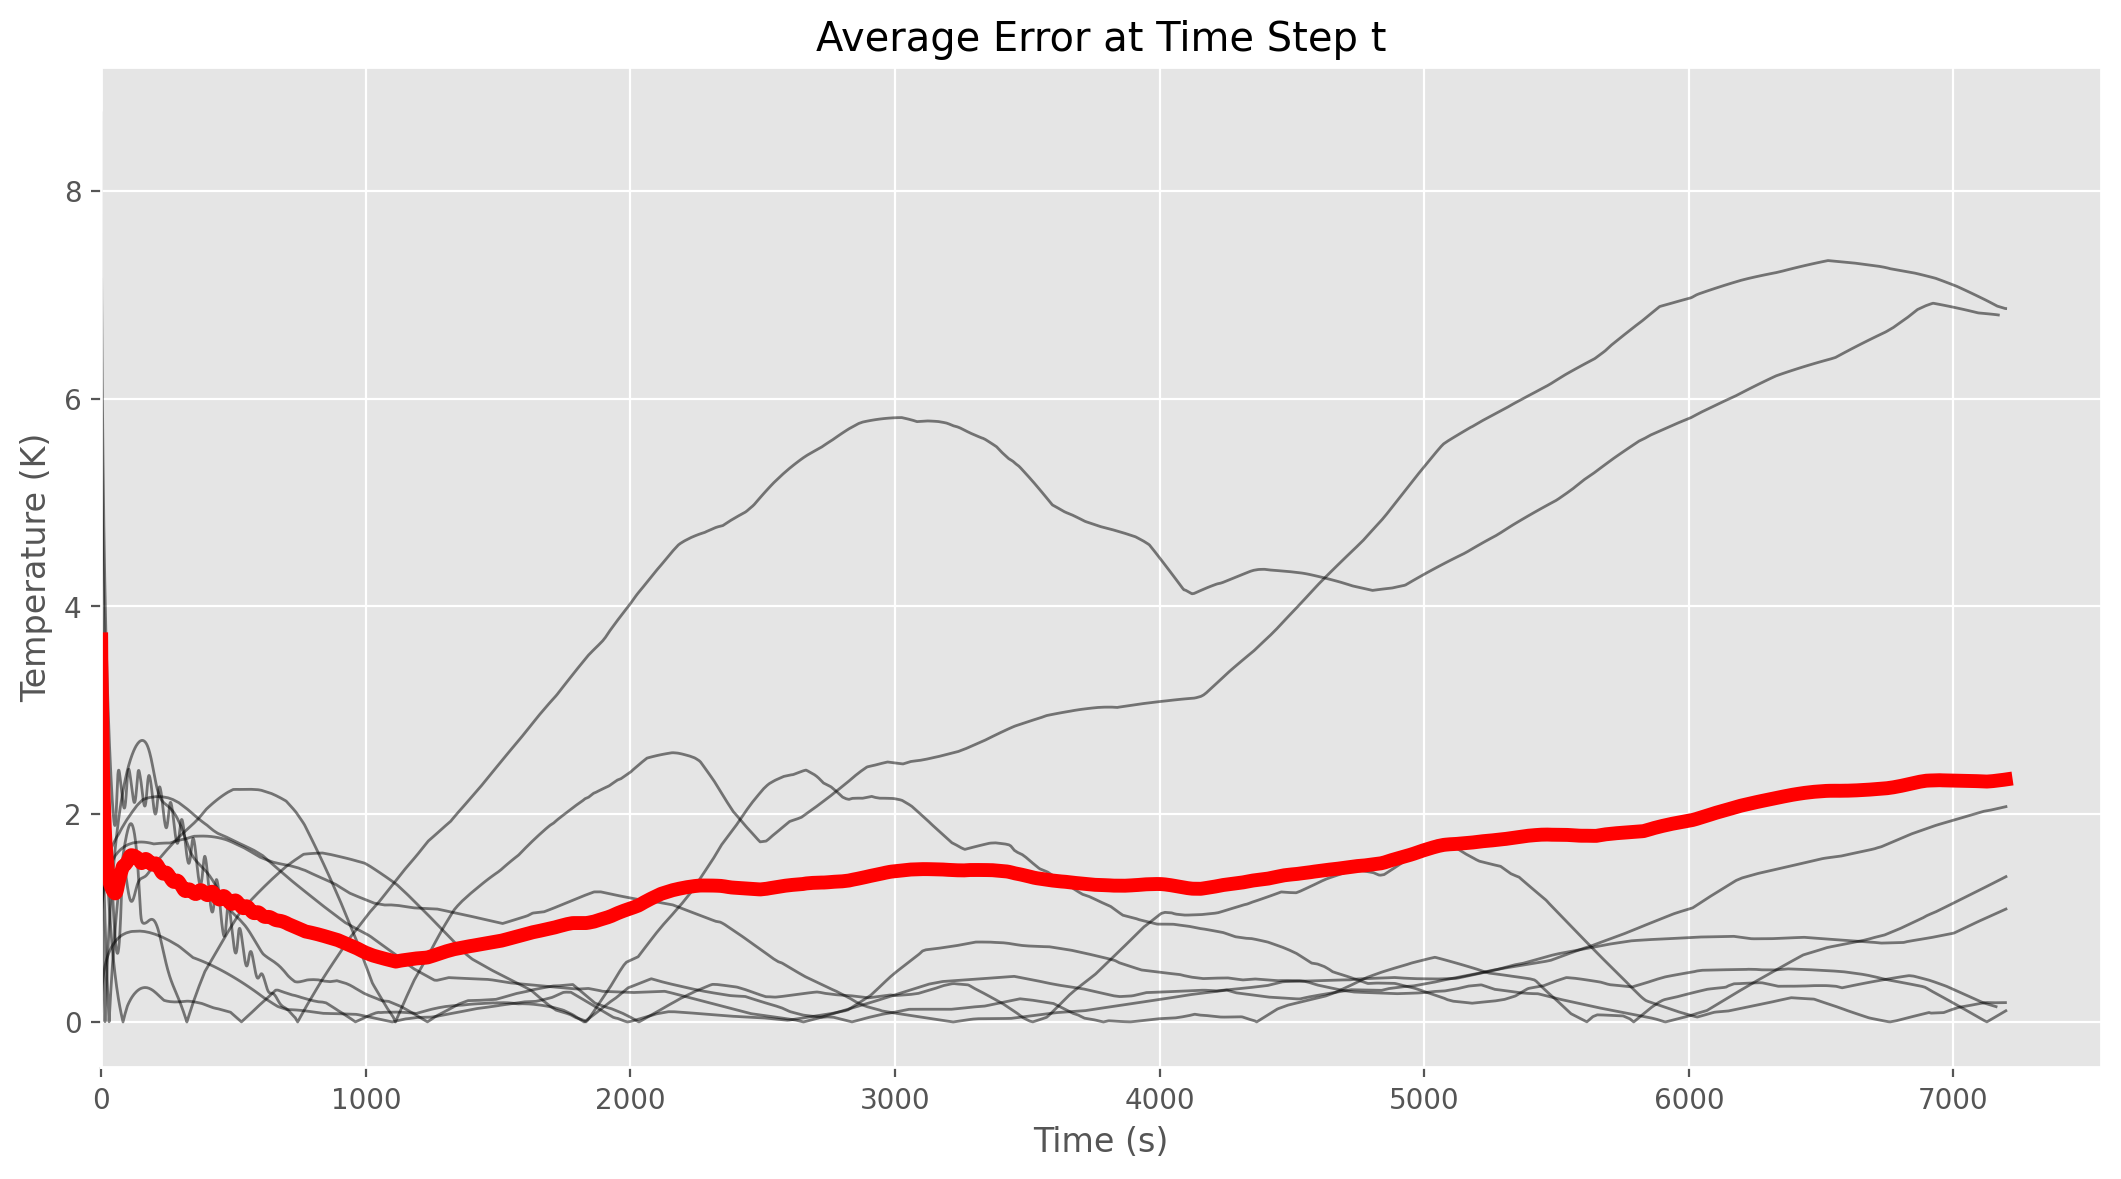

In [24]:
avg_error = plot_average_error(test_df, target=target)

<AxesSubplot:>

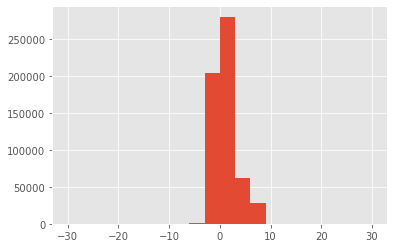

In [25]:
(test_df[target] - test_df[target+'_hat']).hist(bins=20, range=(-30, 30))

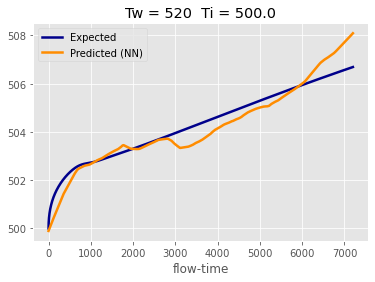

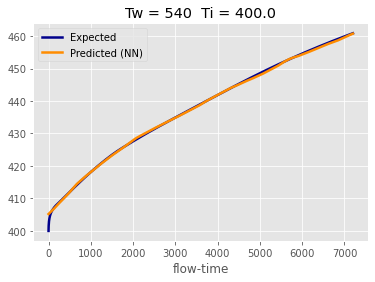

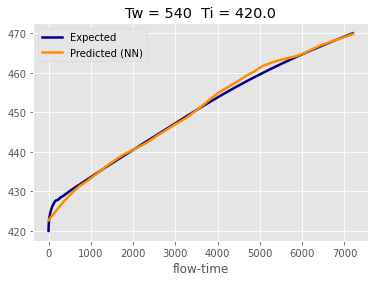

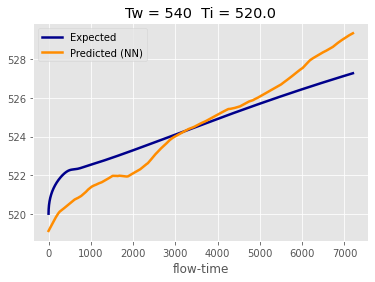

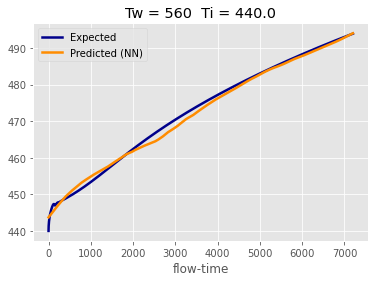

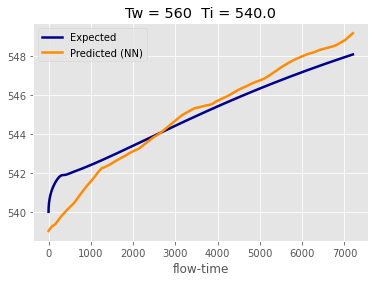

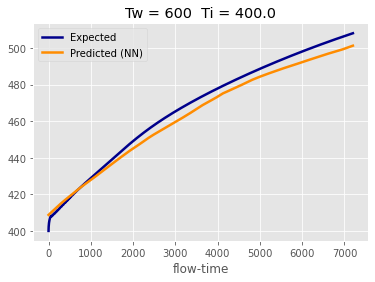

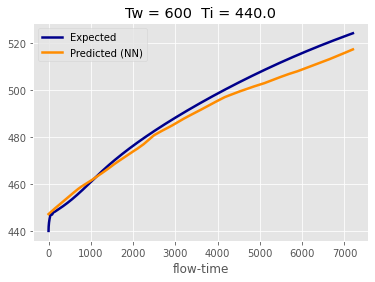

In [26]:
plot_test_results(test_df, model_type, target)

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


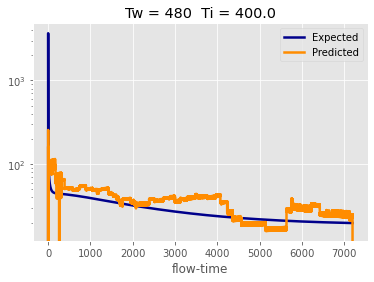

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


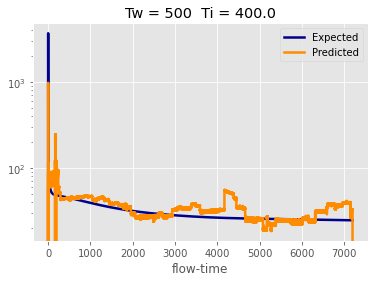

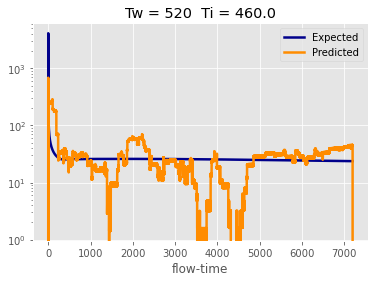

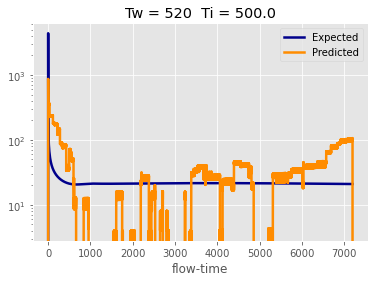

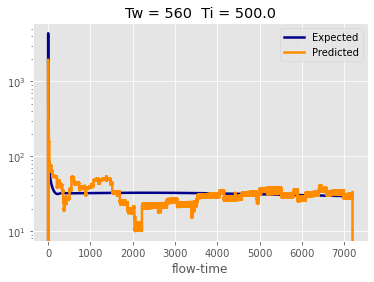

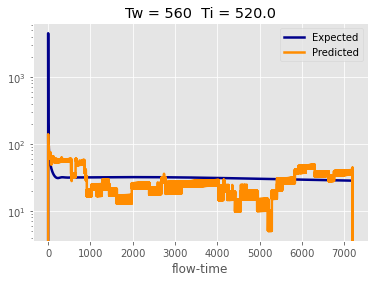

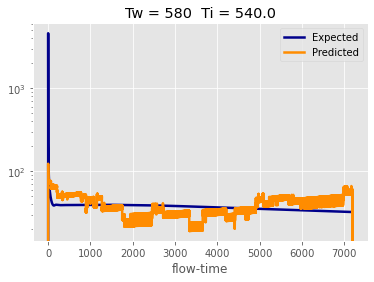

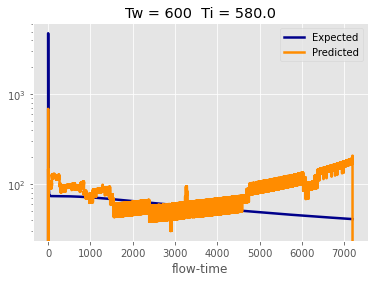

In [17]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(test_df, plot=True)
else:
    rmse, r2 = get_T_from_h_results(test_df, plot=True)

In [18]:
print(rmse)

57.65940055800794


In [19]:
print(r2)

-0.1347616866691972
